<a href="https://colab.research.google.com/github/djsg2021utec/project_Christian/blob/main/Proyecto_Christian_compartido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Objetivos de este Notebook**

---

Darle seguimiento a los requierimientos de visualización de datos del Trabajo Final de Máster (TFM) de Christian Quispe Cubas.

### **Entregables**
---
1. Primer Entregable: Extracción de datos de la API de _Climate Data Store_ (CDS) y creación de gráficas.
2. Segundo Entregable: Cálculo de correlaciones con la data de Christian.csv
3. Tercer Entregable: Correlación entre las medidas de ORCA con la presión y temperatura a las diferentes alturas.
3. Cuarto Entregable:

## **1. Primer Entregable**
---
**Objetivo**: Conseguir los Outputs

**Inputs**
---
**Fechas:**: 2020–03-01 a 2022-03-1

**Mediciones:** Temperatura, presión desde 0 km de altura hasta 20 km en intervalos de mil metros. Datos horarios (24 medidas/dia)

**Ubicación:** Base Juan Carlos I, Isla Livingston, archipielago Shetlands del Sur (Antártida)

**Outputs**
---

1. Gráfica única con las temperaturas en función del tiempo y para los 20 niveles de altura.
2. Gráfica única con las presiones en función del tiempo y para los 20 niveles de altura.


Descargar desde el API.
Nota: Esto puede tardar más de 20 minutos.

In [ ]:
#@title **Ingrese y extraiga datos con el API (Opcional)**
#@markdown Accesos: Ingrese el url y el key del API
%%capture
import os

url = "https://cds.climate.copernicus.eu/api/v2" #@param {type:"string"}
key = "237754:87e792cd-fe09-4cde-b54f-f6e3f3aa59ae" #@param {type:"string"}
url = 'url: '+url
key = 'key: '+key

with open('/root/.cdsapirc', 'w') as f:
    f.write('\n'.join([url, key]))

with open('/root/.cdsapirc') as f:
    print(f.read())

#@markdown Configure el json con le fin de ajustar los datos que desea obtener.


!pip install cdsapi

## Pegar la información del API
import cdsapi

c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-pressure-levels-monthly-means',
    {
        'format': 'netcdf',
        'variable': [
            'relative_humidity', 'temperature',
        ],
        'product_type': 'monthly_averaged_reanalysis_by_hour_of_day',
        'time': [
            '00:00', '01:00', '02:00',
            '03:00', '04:00', '05:00',
            '06:00', '07:00', '08:00',
            '09:00', '10:00', '11:00',
            '12:00', '13:00', '14:00',
            '15:00', '16:00', '17:00',
            '18:00', '19:00', '20:00',
            '21:00', '22:00', '23:00',
        ],
        'month': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
        ],
        'year': [
            '2020', '2021', '2022',
        ],
        'pressure_level': [
            '50', '70', '100',
            '125', '150', '175',
            '200', '225', '250',
            '300', '350', '400',
            '450', '500', '550',
            '600', '700', '800',
            '900', '1000',
        ],
        'area': [
            -62.65, -60.39, -62.67,
            -60.37,
        ],
    },
    'download.nc')

In [67]:
#@title **Instalar bibliotecas para la visualización de datos**

# Bibliotecas para trabajar arrays multidimensionales
%%capture
!pip install cartopy
!pip install h5pyd
import h5pyd
import numpy as np
import xarray as xr

# Bibliotecas para graficar los datos
import matplotlib.path as mpath
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature




### **Gráfico de temperatura (°C) vs nivel de presión (milibares)**

In [68]:
# Descargar el dataset de un repositorio de GitHub y guardarlo como un xr array
!wget https://github.com/djsg2021utec/project_Christian/blob/main/download.nc
dataset = xr.open_dataset("download.nc")
dataset

--2023-08-31 00:31:08--  https://github.com/djsg2021utec/project_Christian/blob/main/download.nc
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4280 (4.2K) [text/plain]
Saving to: ‘download.nc.1’

download.nc.1       100%[===================>]   4.18K  --.-KB/s    in 0s      

2023-08-31 00:31:08 (62.2 MB/s) - ‘download.nc.1’ saved [4280/4280]



<xarray.Dataset>
Dimensions:    (longitude: 1, latitude: 1, level: 12, time: 864)
Coordinates:
  * longitude  (longitude) float32 -60.39
  * latitude   (latitude) float32 -62.67
  * level      (level) int32 30 50 100 200 300 400 500 600 700 800 900 1000
  * time       (time) datetime64[ns] 2020-01-01 ... 2022-12-01T23:00:00
Data variables:
    r          (time, level, latitude, longitude) float32 ...
    t          (time, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-08-30 20:55:57 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [69]:
# Se extrae
dataframe = dataset['t']
dataframe

<xarray.DataArray 't' (time: 864, level: 12, latitude: 1, longitude: 1)>
[10368 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -60.39
  * latitude   (latitude) float32 -62.67
  * level      (level) int32 30 50 100 200 300 400 500 600 700 800 900 1000
  * time       (time) datetime64[ns] 2020-01-01 ... 2022-12-01T23:00:00
Attributes:
    units:          K
    long_name:      Temperature
    standard_name:  air_temperature

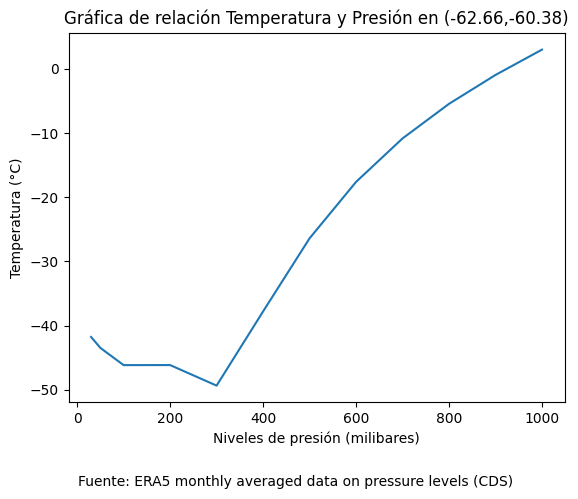

In [76]:
# Cambiando la temperatura de K a °C
da_degc = dataframe - 273.15
da_degc = da_degc.assign_attrs(dataframe.attrs)
da_degc.attrs['units'] = '° C'
# Graficando la gráfica de relación Temperatura y Presión
da_degc[0,:,:].plot()
plt.title("Gráfica de relación Temperatura y Presión en (-62.66,-60.38)")
plt.xlabel("Niveles de presión (milibares)")
plt.ylabel("Temperatura (°C)")
plt.text(1,-65,"Fuente: ERA5 monthly averaged data on pressure levels (CDS)")
plt.show()

Text(0.5, 1.0, 'Gráfica de relación Temperatura y Presión en el tiempo (-62.66,-60.38)')

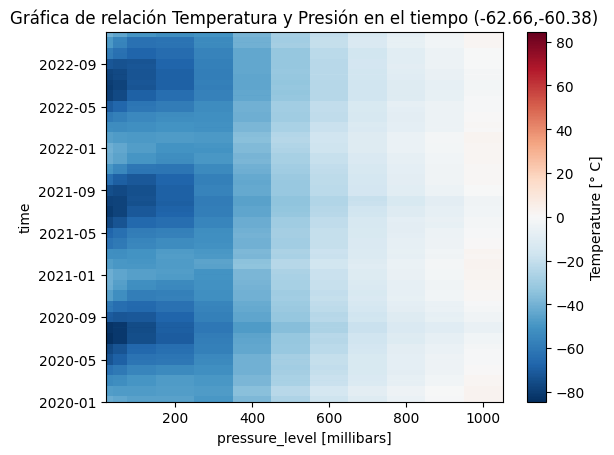

In [78]:
# Graficando la gráfica de relación Temperatura y Presión en el tiempo
da_degc[:,:,:].plot()
plt.title("Gráfica de relación Temperatura y Presión en el tiempo (-62.66,-60.38)")



### **Gráfico serie de tiempo de la temperatura (°C) a diferentes niveles de presión en (-62.66,-60.38)**

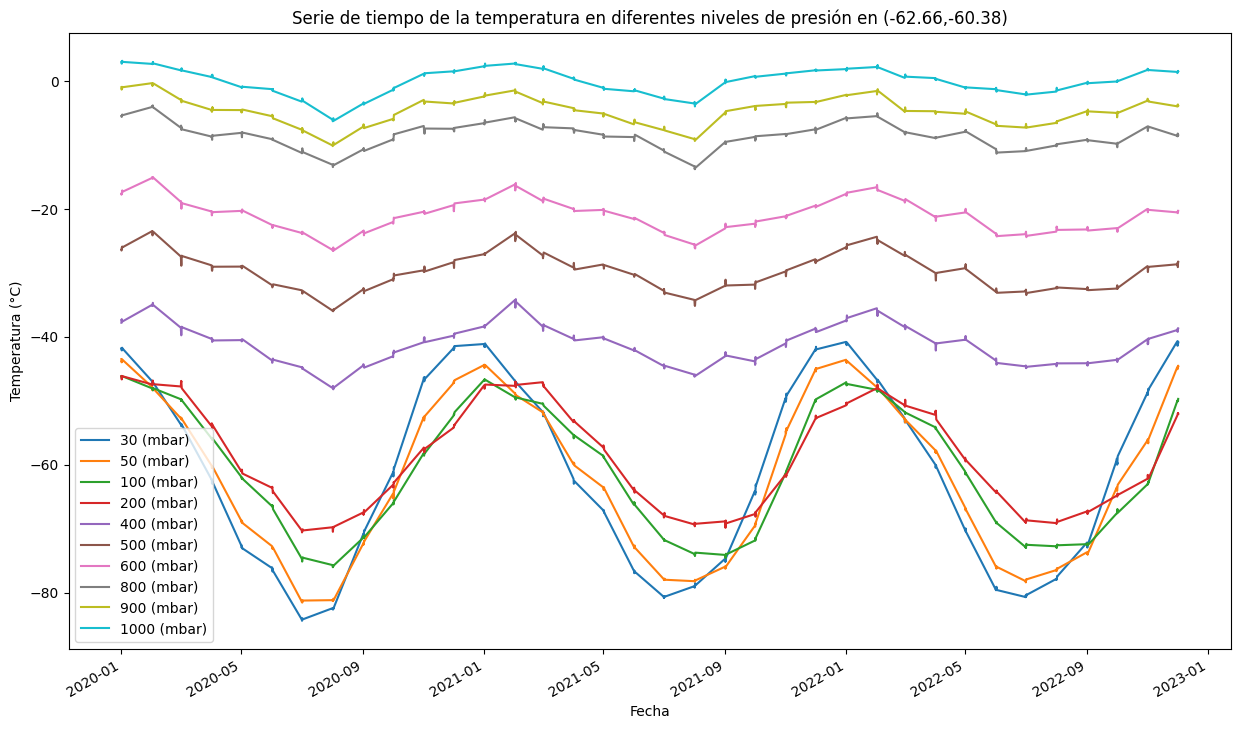

In [72]:
# Lista de niveles que quieres graficar
levels_to_plot = [30, 50, 100, 200, 400, 500, 600, 800, 900, 1000]

plt.figure(figsize=(15, 8))

for lev in levels_to_plot:
    data_to_plot = da_degc.sel(level=lev, method='nearest')
    data_to_plot.plot(label=f'{lev} (mbar)')

plt.title('Serie de tiempo de la temperatura en diferentes niveles de presión en (-62.66,-60.38)')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

## **2. Segundo Entregable**
---
**Objetivo**: Conseguir los Outputs

**Inputs**
---
**Fechas:**: 2020–03-01 a 2022-03-1

**Mediciones:** ORCA(c/min),ORCB(c/min),coin8(c/min),Top(c/min),Bottom(c/min), Presion (P[hPa]), Temperatura (T[ºC]) y Humedad relativa (HR[%])

Adicional:
 - ORCA: 3NM64 neutron monitor
 - ORCB: neutron monitor without any shielding around
 - ORCM (coin8, Top, Bottom): muon telescope

**Ubicación:** Base Juan Carlos I, Isla Livingston, archipielago Shetlands del Sur (Antártida)

**Outputs**
---

1. Series de tiempo de los datos (8 gráficos).
2. Determinar las correlaciones entre las cuentas de los instrumentos vs (Presión,Temperatura) en diferentes alturas.
3. Buscar la mayor correlación.


### Análisis de los datos de muones y neutrones

In [79]:
import pandas as pd

In [80]:
data_mn = pd.read_csv("https://raw.githubusercontent.com/djsg2021utec/project_Christian/main/Christianh.csv")

In [81]:
#Conviertiéndolo a fecha
data_mn=data_mn.rename(columns={'Unnamed: 0':'date'})
data_mn['date'] = pd.to_datetime(data_mn['date'])

In [91]:
data_mn

,date,ORCA,ORCB,coin8,Top,Bottom,P,T,HR
0,2020-03-01 00:00:00,2601.734881,328.238214,NaN,11783.633333,7880.866667,973.393333,9.688333,54.656667
1,2020-03-01 01:00:00,2611.096407,328.452448,NaN,11820.866667,7898.983333,973.021667,9.591667,54.323333
2,2020-03-01 02:00:00,2618.098650,324.985133,NaN,11793.733333,7914.850000,972.891667,9.460000,53.796667
3,2020-03-01 03:00:00,2584.091265,323.631277,NaN,11800.950000,7907.200000,972.941667,9.395000,53.636667
4,2020-03-01 04:00:00,2585.146552,319.192377,NaN,11795.166667,7904.566667,973.535000,9.346667,53.540000
...,...,...,...,...,...,...,...,...,...
17539,2022-03-01 19:00:00,2211.992367,283.839324,1728.683333,11471.866667,7851.450000,994.476667,10.866667,50.378333
17540,2022-03-01 20:00:00,2212.271147,283.353443,1733.866667,11461.483333,7832.466667,995.021667,10.866667,49.948333
17541,2022-03-01 21:00:00,2183.347636,281.075827,1728.366667,11447.033333,7830.666667,995.746667,10.663333,49.615000
17542,2022-03-01 22:00:00,2176.278152,279.986575,1730.516667,11419.433333,7830.550000,996.475000,10.135000,49.885000


### Graficar la serie de tiempo de los instrumentos de muones y electrones

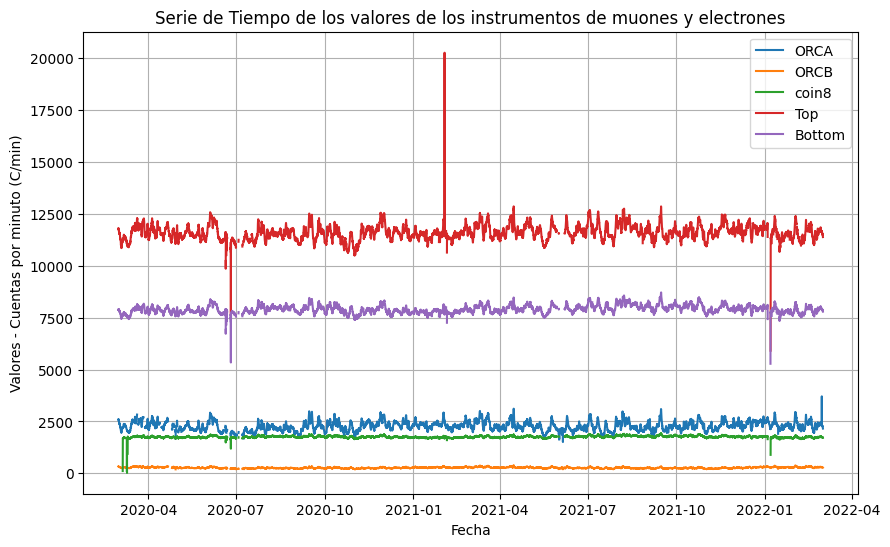

In [97]:
# Graficar la serie de tiempo de los instrumentos de muones y electrones
df = data_mn
# Lista de columnas que quieres graficar
columns_to_plot = ['ORCA', 'ORCB', 'coin8', 'Top', 'Bottom']

plt.figure(figsize=(10, 6))  # Tamaño del gráfico

for column in columns_to_plot:
    plt.plot(df['date'], df[column], linestyle='-', label=column)

plt.xlabel('Fecha')
plt.ylabel('Valores - Cuentas por minuto (C/min)')
plt.title('Serie de Tiempo de los valores de los instrumentos de muones y electrones')
plt.legend()  # Añade una leyenda para identificar cada línea
plt.grid(True)
plt.show()


### Graficar la serie de tiempo de los parámetro ambientales (P,T,HR)

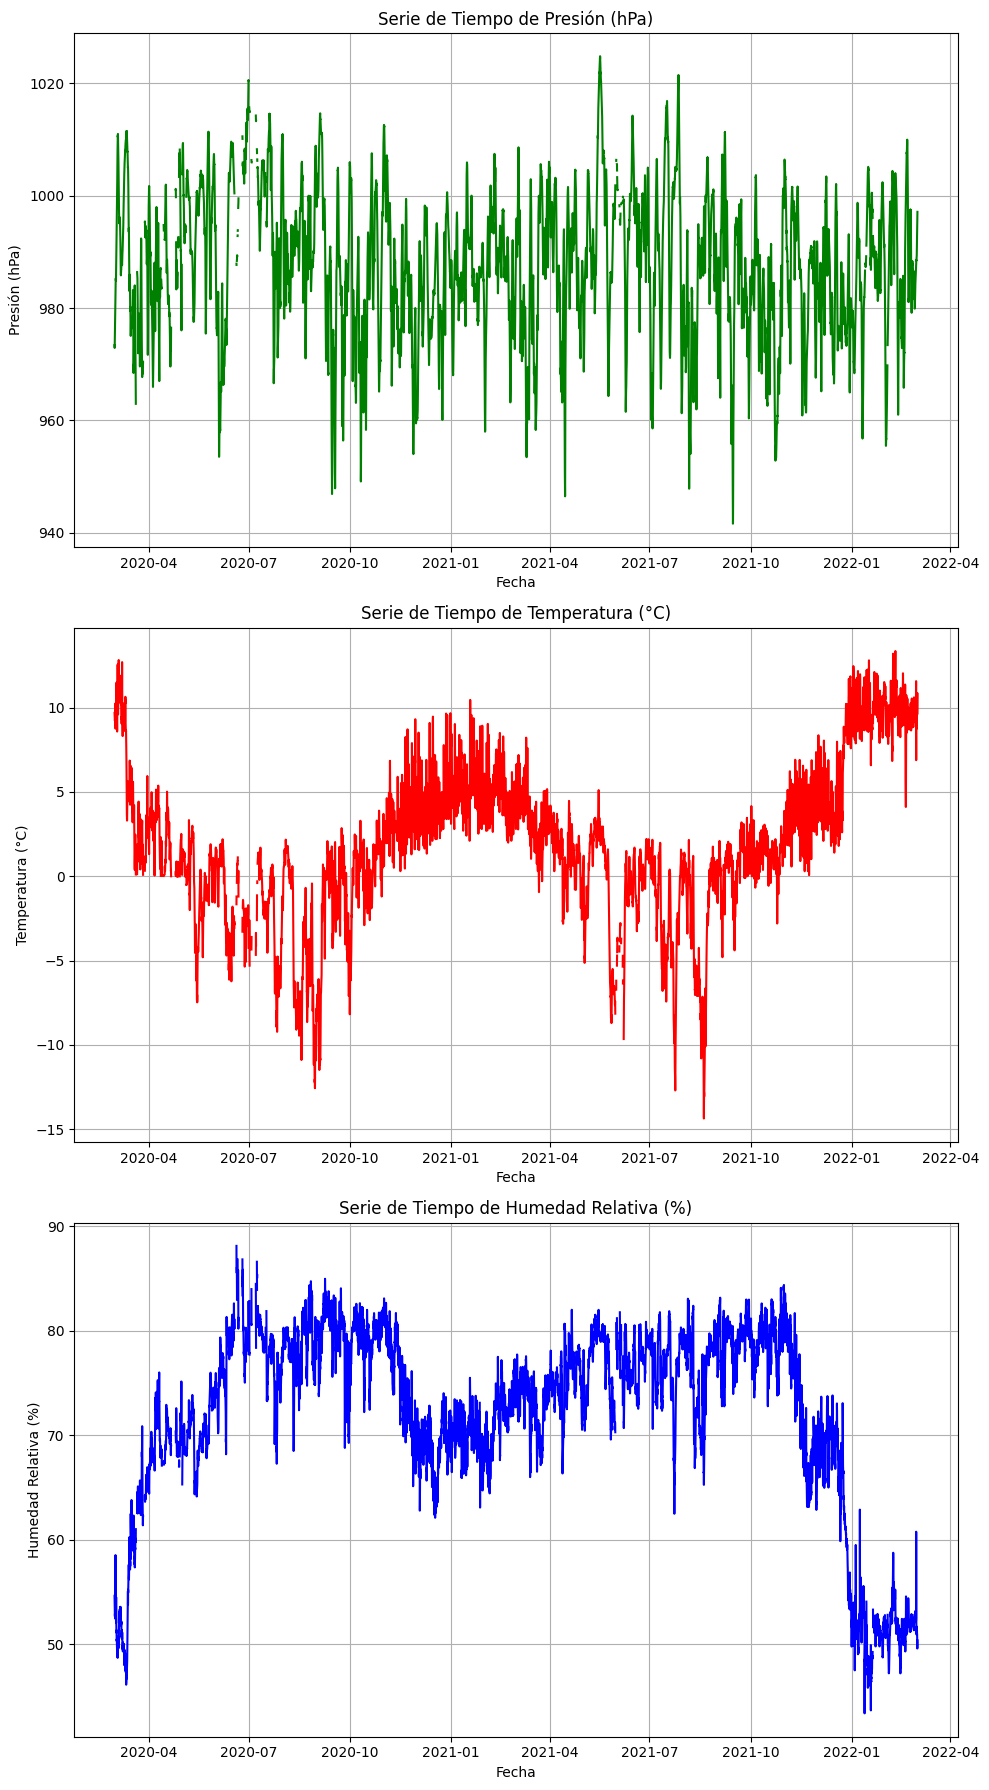

In [99]:
# Graficar la serie de tiempo de parámetros ambientales (Presión, Temperatura y Humedad Relativa)
df = data_mn

# Lista de columnas y etiquetas que quieres graficar
columns_to_plot = ['P', 'T', 'HR']
ylabels = ['Presión (hPa)', 'Temperatura (°C)', 'Humedad Relativa (%)']
colors = ['green', 'red', 'blue']  # Colores para cada subgráfico

plt.figure(figsize=(10, 18))  # Tamaño del gráfico

# Utilizar un bucle para crear cada subgráfico
for i, (column, ylabel, color) in enumerate(zip(columns_to_plot, ylabels, colors)):
    plt.subplot(3, 1, i + 1)  # 3 filas, 1 columna, índice del gráfico
    plt.plot(df['date'], df[column], linestyle='-', color=color)
    plt.xlabel('Fecha')
    plt.ylabel(ylabel)
    plt.title(f'Serie de Tiempo de {ylabel}')
    plt.grid(True)

plt.tight_layout()  # Ajusta el espaciado para evitar la superposición
plt.show()



In [102]:
#Calculando las correlaciones
df = data_mn
# Lista de columnas que quieres correlacionar con 'T'
columns_to_correlate = ['ORCA', 'ORCB', 'coin8', 'Top', 'Bottom']

# Calcular la correlación de estas columnas con 'T'
correlations_T = df[columns_to_correlate].corrwith(df['T'])
correlations_P = df[columns_to_correlate].corrwith(df['P'])
correlations_HR = df[columns_to_correlate].corrwith(df['HR'])

# Imprimir las correlaciones
print("Correlaciones con la temperatura (°C):")
print(correlations_T)

print("Correlaciones con la presión (hPa):")
print(correlations_P)

print("Correlaciones con la humedad relativa (%):")
print(correlations_HR)


Correlaciones con la temperatura (°C):
ORCA      0.289566
ORCB      0.411058
coin8    -0.243400
Top      -0.018041
Bottom   -0.213174
dtype: float64
Correlaciones con la presión (hPa):
ORCA     -0.958522
ORCB     -0.734157
coin8    -0.594530
Top      -0.784529
Bottom   -0.713039
dtype: float64
Correlaciones con la humedad relativa (%):
ORCA     -0.160357
ORCB     -0.399325
coin8     0.232507
Top       0.002911
Bottom    0.185080
dtype: float64


## **2. Tercer Entregable**
---
**Objetivo**: Conseguir los Outputs

**Inputs**
---
**Fechas:**: 2020–03-01 a 2022-03-1

**Mediciones:** ORCA(c/min),ORCB(c/min),coin8(c/min),Top(c/min),Bottom(c/min), Presion (P[hPa]), Temperatura (T[ºC]) y Humedad relativa (HR[%])

Adicional:
 - ORCA: 3NM64 neutron monitor
 - ORCB: neutron monitor without any shielding around
 - ORCM (coin8, Top, Bottom): muon telescope

**Ubicación:** Base Juan Carlos I, Isla Livingston, archipielago Shetlands del Sur (Antártida)

**Outputs**
---

1.  Correlación entre las medidas de ORCA (ORC-A, ORC-B, ORC-M (Top, Bottom y coin8) con la presión y temperatura a las diferentes alturas.
2. Encontrar las alturas en las que las correlaciones con P y T de las medidas de ORCA, ORCB, ORCM son mayores.



## PREGUNTAS PENDIENTES

1. Faltan más puntos de altura en el dataset de Christian.csv (Necesario para obtener el tercer entregable)

